<a href="https://colab.research.google.com/github/mayfluf/koru/blob/main/Miniprojetio_koru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [1]:
import pandas as pd  #para manipulação de dados
import numpy as np  #para manipulaão numericos
import matplotlib.pyplot as plt  # para criar visualizações
!pip install ucimlrepo #instalando a base pelo link fornecido no site

#Carregamento do datasete

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [3]:
# Em vez de ler do URL, usaremos os dataframes X e y já carregados.
df = X.copy() # Copiamos os dados de features
df = df.join(y)
print(df.head())  # Exibe as primeiras 5 linhas do DataFrame

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


## Manipulação de Dados com Pandas


In [4]:
print(df.info())  # Mostra tipos de dados e contagem de valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Selecionando uma coluna específica
idades = df['age']  # Acessa a coluna 'age' usando colchetes
print("\nIdades dos alunos:")  # Título para a seção
print(idades.head())  # Mostra as primeiras idades


Idades dos alunos:
0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64


In [6]:
# Selecionando múltiplas colunas
dados_pessoais = df[['sex', 'age', 'address']]  # Lista de colunas dentro de colchetes duplos
print("\nDados pessoais:")
print(dados_pessoais.head())


Dados pessoais:
  sex  age address
0   F   18       U
1   F   17       U
2   F   15       U
3   F   15       U
4   F   16       U


In [7]:
# Filtrando dados
alunos_urbanos = df[df['address'] == 'U']  # Filtra alunos com endereço urbano
print("\nAlunos urbanos:")
print(alunos_urbanos.head())


Alunos urbanos:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


##Operações básicas

In [8]:
contagem_sexo = df['sex'].value_counts()  # Conta ocorrências de cada valor
print("\nDistribuição por sexo:")
print(contagem_sexo)


Distribuição por sexo:
sex
F    383
M    266
Name: count, dtype: int64


In [9]:
# Médias
media_notas = df['G3'].mean()  # Calcula a média da nota final
print(f"\nMédia das notas finais (G3): {media_notas:.2f}")  # Formata o resultado


Média das notas finais (G3): 11.91


## Agrupamento de dados


In [10]:
# Média de notas por sexo
media_por_sexo = df.groupby('sex')['G3'].mean()  # Agrupa por sexo e calcula média de G3
print("\nMédia de notas por sexo:")
print(media_por_sexo)


Média de notas por sexo:
sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


In [11]:
# Adicionando novas colunas
# Calculando a nota total (G1 + G2 + G3)
df['nota_total'] = df['G1'] + df['G2'] + df['G3']  # Soma das colunas de notas
print("\nDataFrame com nota total:")
print(df[['G1', 'G2', 'G3', 'nota_total']].head())


DataFrame com nota total:
   G1  G2  G3  nota_total
0   0  11  11          22
1   9  11  11          31
2  12  13  12          37
3  14  14  14          42
4  11  13  13          37


In [12]:

# Criando uma coluna condicional
# Classificação baseada na nota final
desempenho = []  # Lista para armazenar os resultados

# Iterar por cada nota na coluna G3
for nota in df['G3']:
    if nota >= 16:
        desempenho.append('Excelente')
    elif nota >= 14:
        desempenho.append('Bom')
    elif nota >= 10:
        desempenho.append('Suficiente')
    else:
        desempenho.append('Insuficiente')

# Adicionar a lista como nova coluna no DataFrame
df['desempenho'] = desempenho

print("\nDistribuição de desempenho:")
print(df['desempenho'].value_counts())


Distribuição de desempenho:
desempenho
Suficiente      355
Bom             112
Insuficiente    100
Excelente        82
Name: count, dtype: int64


In [23]:
# Renomear colunas para melhor compreensão
df = df.rename(columns={
    'Fedu': 'Educacao_Pai',
    'Pstatus': 'Status_Pais',
    'guardian': 'Guardião',
    'reason': 'Razao_Escola',
    'freetime': 'Tempo_Livre',
    'G3': 'Nota_Final'
})

#Visualização de dados

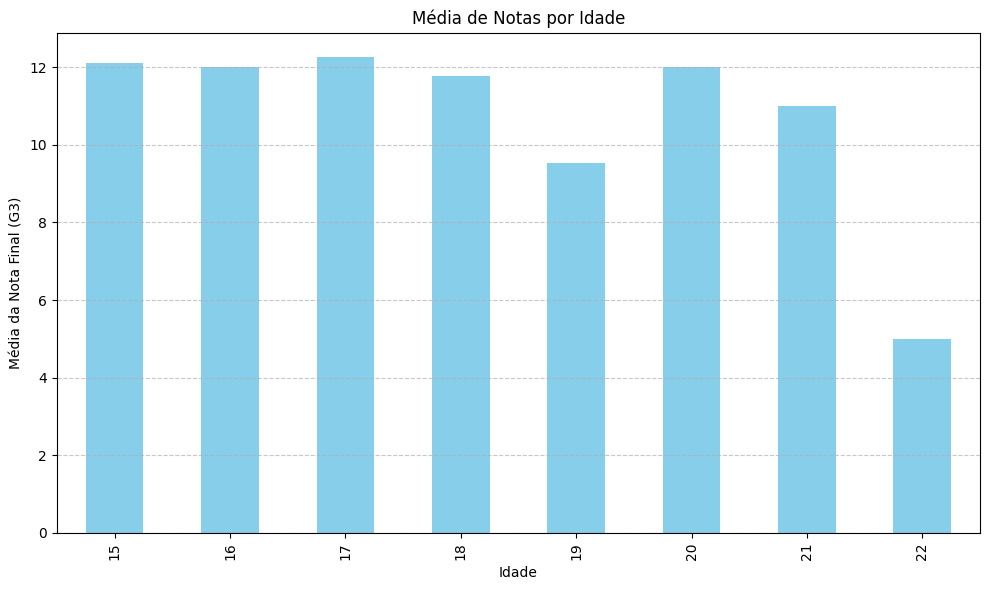

In [13]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico (largura, altura)

# Gráfico de barras: Média de notas por idade
# Primeiro agrupamos os dados
media_por_idade = df.groupby('age')['G3'].mean()  # Agrupa por idade e calcula média

# Criando o gráfico
media_por_idade.plot(kind='bar', color='skyblue')  # Tipo barra, cor azul claro
plt.title('Média de Notas por Idade')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Média da Nota Final (G3)')  # Rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais tracejadas
plt.tight_layout()  # Ajusta layout automaticamente
plt.savefig('media_notas_por_idade.png')  # Salva o gráfico como imagem
plt.show()  # Mostra o gráfico na tela

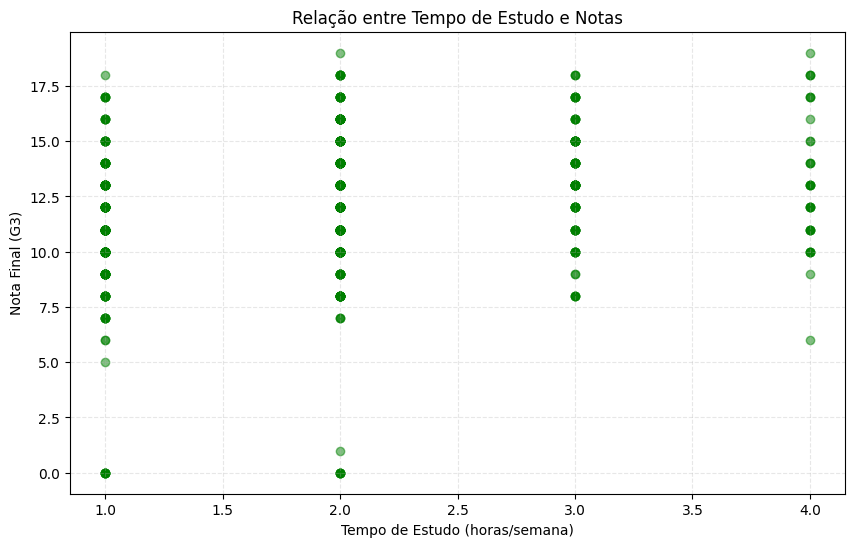

In [14]:
# Gráfico de dispersão: Relação entre tempo de estudo e notas
plt.figure(figsize=(10, 6))  # Nova figura

# Criando o gráfico de dispersão
plt.scatter(
    x=df['studytime'],  # Valores do eixo X (tempo de estudo)
    y=df['G3'],         # Valores do eixo Y (nota final)
    alpha=0.5,          # Transparência para ver sobreposição
    color='green'       # Cor dos pontos
)

plt.title('Relação entre Tempo de Estudo e Notas')  # Título
plt.xlabel('Tempo de Estudo (horas/semana)')  # Rótulo eixo X
plt.ylabel('Nota Final (G3)')  # Rótulo eixo Y
plt.grid(True, linestyle='--', alpha=0.3)  # Grades com transparência
plt.savefig('relacao_estudo_notas.png')  # Salva o gráfico
plt.show()  # Mostra o gráfico

In [15]:
# Análise avançada: Correlações
correlacoes = df.corr(numeric_only=True)  # Calcula correlações entre colunas numéricas
print("\nMatriz de correlações:")  # Título
print(correlacoes['G3'].sort_values(ascending=False))  # Mostra correlações com G3 ordenadas

# Exportando resultados
# DataFrame com alunos de alto desempenho
alto_desempenho = df[df['desempenho'] == 'Excelente']  # Filtra alunos excelentes
alto_desempenho.to_csv('alunos_excelentes.csv', index=False)  # Salva em CSV sem índice

print("\nProcesso concluído! Resultados salvos em arquivos.")  # Mensagem final


Matriz de correlações:
G3            1.000000
nota_total    0.961829
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

Processo concluído! Resultados salvos em arquivos.


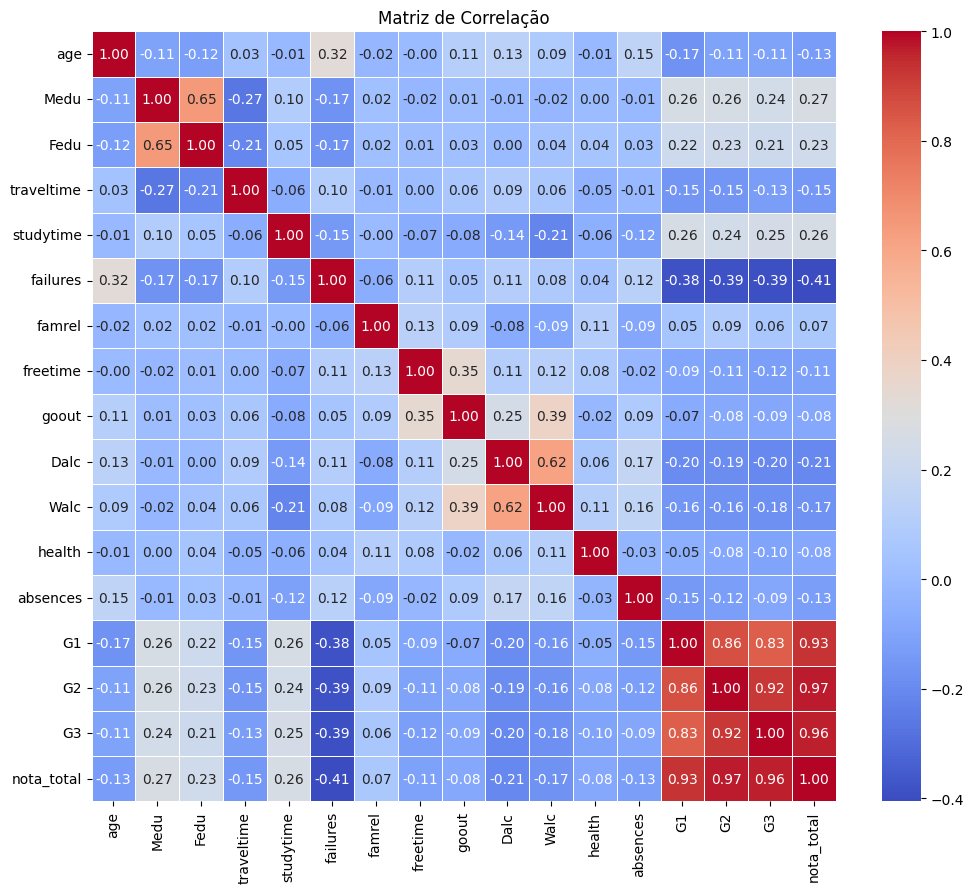

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

#Análise da Matriz de Correlaçãos Relações entre Variáveis



A matriz de correlação é uma ferramenta estatística essencial que mostra como as diferentes variáveis se relacionam entre si.

Vou explicar o que ela significa e o que devemos observar:

O que a Matriz de Correlação Significa

Valores de correlação:


1.   1.00: Correlação positiva perfeita (as duas variáveis aumentam juntas)

2.   -1.00: Correlação negativa perfeita (uma aumenta quando a outra diminui)

3.   0.00: Nenhuma correlação


*Valores próximos de ±0.5 ou mais são considerados correlações significativas*


Como ler a matriz:

Cada célula mostra a correlação entre a variável da linha e a variável da coluna

A diagonal principal (valores 1.00) mostra a correlação de cada variável consigo mesma

---

#Principais Observações na Matriz

- Correlações Fortes (Destacadas em vermelho):
Medu e Fedu	0.65	Educação da mãe e do pai estão fortemente relacionadas
G1, G2 e G3	0.83-0.97	As notas são altamente consistentes entre períodos
Dalc e Walc	0.62	Consumo de álcool durante a semana e no fim de semana estão relacionados


- Correlações Moderadas (Destacadas em laranja):
failures e G1/G2/G3	-0.38 a -0.41	Quanto mais reprovações, menores as notas
studytime e G1/G2/G3	0.24-0.26	Mais tempo de estudo está associado a notas melhores
Medu/Fedu e G1/G2/G3	0.22-0.27	Educação dos pais associada a melhores notas

- Correlações Fracas (Destacadas em amarelo):
age e failures	0.32	Alunos mais velhos têm mais reprovações
freetime e goout	0.35	Mais tempo livre associado a sair mais com amigos
Dalc e G1/G2/G3	-0.19 a -0.21	Consumo de álcool associado a notas mais baixas



###Insights Importantes

1. Fatores que Influenciam as Notas
Fatores positivos:

Educação dos pais (Medu, Fedu)

Tempo de estudo (studytime)

Fatores negativos:

Reprovações anteriores (failures)

Consumo de álcool (Dalc, Walc)

Idade (age) - alunos mais velhos têm notas mais baixas

2. Relações Comportamentais
Consumo de álcool: Fortemente correlacionado entre semana e fim de semana (Dalc e Walc)

Atividades sociais: Tempo livre (freetime) correlacionado com sair com amigos (goout)

Faltas: Associadas negativamente com notas (absences e notas)

3. Padrões Familiares
Educação dos pais correlacionada (0.65), sugerindo que pais tendem a ter níveis educacionais similares

Educação dos pais também correlacionada com notas dos filhos

---
###O Que Devemos Observar

Correlações fortes (> |0.5|):

São os relacionamentos mais importantes

Podem indicar relações causais ou áreas para intervenção

1. Correlações negativas:

Identificam fatores de risco (ex: failures e notas)

Apontam para problemas que precisam ser resolvidos

2. Ausência de correlação:

Variáveis como famrel (relação familiar) e health (saúde) mostram pouca correlação com notas

Sugere que estes fatores podem não ser tão relevantes para o desempenho acadêmico

3. Padrões inesperados:

Tempo de viagem (traveltime) tem baixa correlação com notas

Faltas (absences) têm correlação mais fraca com notas do que se poderia esperar

---

###Aplicações Práticas

- Intervenções educacionais:

Focar em reduzir reprovações (failures) que impactam fortemente as notas futuras

Promover programas de estudo eficaz (studytime)

- Prevenção de comportamentos de risco:

Desenvolver programas contra o consumo de álcool

Oferecer atividades alternativas para tempo livre

- Apoio familiar:

Engajar pais com menor escolaridade no processo educacional

Conscientizar sobre o impacto da educação dos pais no desempenho dos filhos

---
###Esta matriz revela que o desempenho acadêmico é influenciado por uma rede complexa de fatores pessoais, familiares e comportamentais, com algumas relações sendo muito mais significativas do que outras.